# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


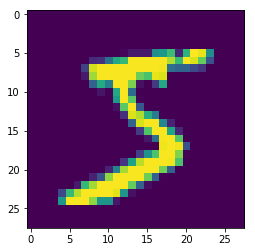

In [44]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [47]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [49]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)


*   For the First CNN, have taken the ICC Code 2 as the Vanilla code. Our aim in to get to 15K params & 99.4 accuracy in 4 code iterations and each iteration having max of 3 changes. 
*   In this architecture, we have two convultion blocks and one transition block with 195k params


In [50]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26,26,32, parmas = 320 ( Calculated using the formula k*(m*n*l +1), where m & n are the image dimensions and l & k are the number of input and output image channels )

model.add(Convolution2D(64, 3, 3, activation='relu')) # 24,24,64, params = 18496 
model.add(Convolution2D(128, 3, 3, activation='relu')) # 22,22,128, params = 73856

model.add(MaxPooling2D(pool_size=(2, 2))) # 11,11,128, maxpool has no trainable params
model.add(Convolution2D(32, 1, 1, activation='relu')) # 11,11,32, params = 4128

model.add(Convolution2D(64, 3, 3, activation='relu')) # 9,9,64, params = 18496
model.add(Convolution2D(128, 3, 3, activation='relu')) # 7,7,128, params = 73856

model.add(Convolution2D(10, 1, activation='relu')) #7,7,10, params = 1290
model.add(Convolution2D(10, 7)) #1,1,10, params = 4910
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 11, 11, 32)        4128      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 7, 7, 128)         73856     
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [53]:
#Added testing data accuracy and loss to verify.
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.1500 - acc: 0.9531 - val_loss: 0.0619 - val_acc: 0.9799
Epoch 2/10
60000/60000 [==============================] - 14s 236us/step - loss: 0.0520 - acc: 0.9839 - val_loss: 0.0362 - val_acc: 0.9875
Epoch 3/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.0402 - acc: 0.9875 - val_loss: 0.0302 - val_acc: 0.9905
Epoch 4/10
60000/60000 [==============================] - 14s 232us/step - loss: 0.0314 - acc: 0.9905 - val_loss: 0.0268 - val_acc: 0.9917
Epoch 5/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.0266 - acc: 0.9916 - val_loss: 0.0361 - val_acc: 0.9895
Epoch 6/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.0214 - acc: 0.9933 - val_loss: 0.0323 - val_acc: 0.9897
Epoch 7/10
60000/60000 [==============================] - 15s 249us/step - loss: 0.0188 - acc: 0.9939 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [55]:
print(score)

[0.031260591131872205, 0.9908]


# Observations of the result : 

*   We have achieved a 99.2% accuracy by the 7th epoch
*   There is a large difference between training accuracy and test accuracy(this is less), which suggests a case of overfitting
*   The training accuracy is plateauing at 99.57
*   The time taken for one epoch is 14secs.
*   Our training accuracy after 2nd epoch is 98.75, which suggests we are going in the right direction.



In [0]:
y_pred = model.predict(X_test)

In [57]:
print(y_pred[:9])
print(y_test[:9])

[[1.26133455e-14 1.44284071e-10 1.10908424e-07 7.88202001e-08
  1.76832846e-13 1.28601042e-15 1.25725030e-23 9.99999762e-01
  2.79553060e-16 2.10557238e-10]
 [4.91420678e-07 1.46574743e-08 9.99999404e-01 4.31189329e-12
  5.00785247e-11 4.11283031e-15 6.89270010e-08 4.72510486e-12
  1.04271780e-09 1.10165020e-14]
 [1.76382339e-10 9.99999285e-01 1.89281337e-08 2.20896010e-11
  5.89593981e-07 4.48724435e-08 1.13714238e-11 1.25648810e-07
  3.88459542e-11 3.90699517e-09]
 [9.99975204e-01 8.34627922e-09 6.57761312e-09 1.49061208e-08
  1.00402383e-06 1.00866009e-08 1.34686716e-05 6.37979047e-09
  2.06586014e-06 8.19348224e-06]
 [9.66373032e-13 5.19232799e-07 8.96912820e-14 5.74393235e-14
  9.99999404e-01 1.44860990e-12 3.11990932e-14 2.92897685e-11
  2.21245461e-12 1.08864512e-07]
 [1.27934302e-10 9.99998569e-01 2.59940314e-09 2.66203726e-12
  1.27729379e-06 7.34102468e-09 4.37092983e-12 1.43210428e-07
  1.03484617e-11 1.15430576e-09]
 [4.81359824e-16 4.93813786e-06 1.67573133e-09 8.43986177e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [59]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_16'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored